In [13]:
import pandas as pd
from collections import defaultdict

df19 = pd.read_csv('./data/2019/nov19pub.csv')
df21 = pd.read_csv('./data/2021/nov21pub.csv')

In [2]:
# Check if there are duplicates in the concatenation of columns "HRHHID" and "HRHHID2" in both datasets
print(len(set(df19['HRHHID'].astype(str) + df19['HRHHID2'].astype(str))), len(df19))
print(len(set(df21['HRHHID'].astype(str) + df21['HRHHID2'].astype(str))), len(df21))
# print unique values of column "HRMONTH"
print(df19['HRMONTH'].unique())
print(df21['HRMONTH'].unique())

70281 138850
68264 127375
[11]
[11]


In [3]:
# print the name of the column with all unique values
print(df19.columns[df19.nunique() == len(df19)])

Index([], dtype='object')


In [4]:
# find fraction of phone internet users
print("2019:", (df19["HEDESKTP"]==1).sum() / len(df19))
print("2021:", (df21["HEDESKTP"]==1).sum() / len(df21))

2019: 0.33460568959308606
2021: 0.3267909715407262


There is some issue with the data - there are duplicates 

In [14]:
# get all rows for a random HHID
print(df19[df19['HRHHID']==df19['HRHHID'].unique()[4]])

df19[df19['HRHHID']==df19['HRHHID'].unique()[0]]["HEDESKTP"]

                HRHHID  HRMONTH  HRYEAR4  HURESPLI  HUFINAL  HULANGCODE  \
4      901002967110858       11     2019         1      201           0   
18258  901002967110858       11     2019         2      201           0   
18259  901002967110858       11     2019         2      201           0   

       HETENURE  HEHOUSUT  HETELHHD  HETELAVL  ...  HENOTV5  HENOTV6  HENOTV7  \
4             1         1         1        -1  ...       -1       -1       -1   
18258         1         1         1        -1  ...        2        2        2   
18259         1         1         1        -1  ...        2        2        2   

       HENOTV8  HENOTV9  HENOTV10  HENOTV11  HENOTV12  PUELGFLG  PWPRMWGT  
4           -1       -1        -1        -1        -1        20  37130922  
18258        2        2         2         2         2        -1         0  
18259        2        2         2         2         2        20  25279503  

[3 rows x 508 columns]


0        1
70451   -1
Name: HEDESKTP, dtype: int64

As we see, there are rows with -1s, and multiple rows can have the same HRHHID, with different answers

HRHHID
931654012010526    16
910100164872448    16
10115354572522     16
196022370405551    16
140002070027134    15
                   ..
20008695103996      1
965683290001009     1
166890902090503     1
299035060018609     1
50610634581470      1
Name: count, Length: 55107, dtype: int64


Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


<Axes: >

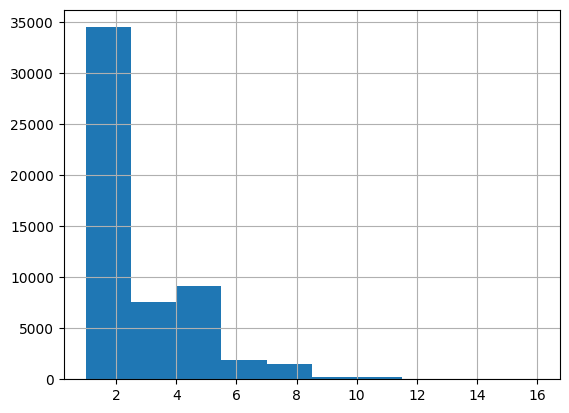

In [16]:
# Print the number of rows for each unique value of column "HRHHID"
print(df19['HRHHID'].value_counts())

# Plot the distribution of the number of rows per unique value of column "HRHHID"
df19['HRHHID'].value_counts().hist()

In [19]:
household_id_to_internet = defaultdict(list)

def calculate_attribute_fraction(df, attribute, value, ignore_values=[]):
    """
    Calculate the fraction of the unique values of the "HRHHID" column that have the attribute "attribute" with value "value"
    Note that we need to take the mode of the attribute value for each unique value of the "groupby" column

    # Ignore the values in the "attribute" column that are in the list "ignore_values" (e.g. -1)
    """

    household_id_to_attribute = defaultdict(list)
    for household_id, attribute_value in zip(df['HRHHID'], df[attribute]):
        household_id_to_attribute[household_id].append(attribute_value)

    # remove the values in the "attribute" column that are in the list "ignore_values" (e.g. -1)
    for household_id, attribute_values in household_id_to_attribute.items():
        household_id_to_attribute[household_id] = [value for value in attribute_values if value not in ignore_values]

    # TODO: Do something better for the case where there are no values left in the list after removing the values in "ignore_values"
    # for now, just remove the key from the dictionary
    household_id_to_attribute = {household_id: attribute_values for household_id, attribute_values in household_id_to_attribute.items() if len(attribute_values) > 0}

    # replace the lists with the mode of the list
    for household_id, attribute_values in household_id_to_attribute.items():
        household_id_to_attribute[household_id] = max(set(attribute_values), key=attribute_values.count)

    # calculate the fraction of the unique values of the "HRHHID" column that have the attribute "attribute" with value "value"
    return sum([1 for household_id, attribute_value in household_id_to_attribute.items() if attribute_value == value]) / len(household_id_to_attribute)

print(calculate_attribute_fraction(df19, "HEMPHONE", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEMPHONE", 1, ignore_values=[-1]))


0.8026362919979941
0.8225750407612328


In [20]:
print(calculate_attribute_fraction(df19, "HEDESKTP", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEDESKTP", 1, ignore_values=[-1]))

0.39838097284905793
0.40892203244861414


In [21]:
print(calculate_attribute_fraction(df19, "HEINWORK", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEINWORK", 1, ignore_values=[-1]))

0.6911297312915342
0.6735398978204139


In [22]:
print(calculate_attribute_fraction(df19, "HEINSCHL", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "HEINSCHL", 1, ignore_values=[-1]))

0.22083721374501517
0.21524603747360543


In [23]:
print(calculate_attribute_fraction(df19, "PESOCIAL", 1, ignore_values=[-1]))
print(calculate_attribute_fraction(df21, "PESOCIAL", 1, ignore_values=[-1]))

0.7396202213980984
0.7419535056953971
